In [2]:
#importing the libraries requried
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataset=pd.read_csv('AirPassengers.csv')

In [4]:

dataset.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [6]:
dataset['Month']=le.fit_transform(dataset['Month'])

In [7]:
dataset

,Month,#Passengers
0,0,112
1,1,118
2,2,132
3,3,129
4,4,121
...,...,...
139,139,606
140,140,508
141,141,461
142,142,390


In [7]:
x=dataset.iloc[:,0:1]

In [8]:
x

,Month
0,0
1,1
2,2
3,3
4,4
...,...
139,139
140,140
141,141
142,142


In [9]:
y=dataset.iloc[:,-1:]

In [10]:
y

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [11]:
x=dataset.iloc[:,0:1].values

In [12]:
training_set = dataset.iloc[:, 1:2].values

In [13]:
y=dataset.iloc[:,-1:].values

In [14]:
x.ndim

2

In [15]:
y.ndim

2

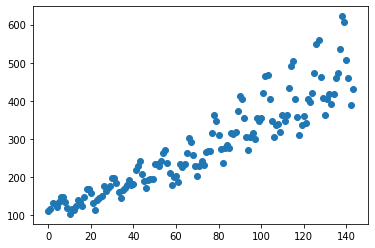

In [16]:
grph1=plt.scatter(x,y)

In [17]:
grph1

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [20]:
#train and test
from sklearn.model_selection import train_test_split
train_len = int(0.9*len(dataset))
test_len = len(dataset) - train_len

train,test = dataset.iloc[:train_len], dataset.iloc[train_len:len(dataset)]
print (dataset.shape,train.shape,test.shape)

(144, 2) (129, 2) (15, 2)


In [21]:
training_set = dataset.iloc[:, 1:2].values

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [23]:
X_train = []
y_train = []
for i in range(0, 144): # upper bound is number of values 
    X_train.append(training_set_scaled[i-0:i, 0]) #takes 60 previous stock prices from 60 past stock prices
    y_train.append(training_set_scaled[i, 0]) #contains stock price learned to predict 
X_train, y_train = np.array(X_train), np.array(y_train)

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [25]:
import tensorflow as tf

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [27]:
regressor = Sequential()

In [28]:
regressor.add(Dropout(0.2))

In [29]:
regressor.add(Dense(units = 1))

In [30]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [31]:
history = regressor.fit(X_train,y_train,epochs=10,batch_size=16, validation_split=0.2,shuffle=False)

Epoch 1/10
8/8 [==============================] - 1s 17ms/step - loss: nan - val_loss: nan
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan


In [32]:
import math


In [33]:
trainscore =regressor.evaluate(X_train,y_train, verbose=0)

In [34]:
print('TrainScore: %.2f MSE (%.2f RMSE)' % (trainscore, math.sqrt(trainscore)))

TrainScore: nan MSE (nan RMSE)


In [35]:
trainscore=regressor.evaluate(x_test,y_test,verbose=0)

In [36]:
print('TrainScore: %.2f MSE (%.2f RMSE)' % (trainscore, math.sqrt(trainscore)))

TrainScore: 93238.41 MSE (305.35 RMSE)


# model building

In [37]:
from flask import render_template, Flask, request,url_for
from keras.models import load_model 
import tensorflow as tf
import pickle
graph=tf.compat.v1.get_default_graph()


In [38]:
import tensorflow as tf 
graph = tf.compat.v1.get_default_graph ()
model = load_model('airline4-copy.h5')
app = Flask(__name__)
app.route('/')

<function flask.scaffold.Scaffold.route.<locals>.decorator(f: Callable) -> Callable>

In [39]:
def home(): 
    return render___template('index.html')
@app.route('/ind')
def index2():
    return render_template('index2.html')

In [40]:
def login ():
    year= request.form['year']
    month= request.form ['month']
    passengers = request.form['passengers']
    total = [year,month, passengers] 
    with graph.as_default():
        #y_pred=model.predict.(x_text)
        from sklearn.proprocessing import RobustScaler
        #rs = RobustScaler()
        rs_pas = RobustScaler()
        y_predict = model.predict(np.array([[total]]))
        scaled_training=rs_pas.fit_transform(y_predict)
        y_pred=rs_pas.inverse_transform(scaled_training.reshape(1,-1)) [0][0]*10
    return render_template('index.html', showcase=str(round(y_pred)))

In [ ]:

if __name__ =="__main__":
    app.run(debug=False)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [04/Aug/2021 11:03:20] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [04/Aug/2021 11:03:21] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
regressor.save('airline4-copy.h5')